In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [2]:
japan_stock = pd.read_csv("../data/japan_stock.csv", parse_dates=True)
japan_bond = pd.read_csv("../data/japan_bond.csv", parse_dates=True)
world_stock = pd.read_csv("../data/world_stock.csv", parse_dates=True)
world_bond = pd.read_csv("../data/world_bond.csv", parse_dates=True)

In [3]:
japan_stock.tail()

,date,price,diff,rate
3209,2016/10/28,17120,126.0,0.735981
3210,2016/10/31,17128,8.0,0.046707
3211,2016/11/1,17129,1.0,0.005838
3212,2016/11/2,16825,-304.0,-1.806835
3213,2016/11/4,16561,-264.0,-1.594107


In [4]:
world_stock.head()

,date,price,diff,rate
0,20020905,10184,NaN,NaN
1,20020906,10100,-84.0,-0.831683
2,20020909,10281,181.0,1.760529
3,20020910,10305,24.0,0.232897
4,20020911,10509,204.0,1.941193


In [5]:
world_stock = world_stock[-len(japan_stock):]
world_stock.head()

,date,price,diff,rate
259,20030926,11152,-50.0,-0.448350
260,20030929,11026,-126.0,-1.142753
261,20030930,11083,57.0,0.514301
262,20031001,10982,-101.0,-0.919687
263,20031002,11162,180.0,1.612614


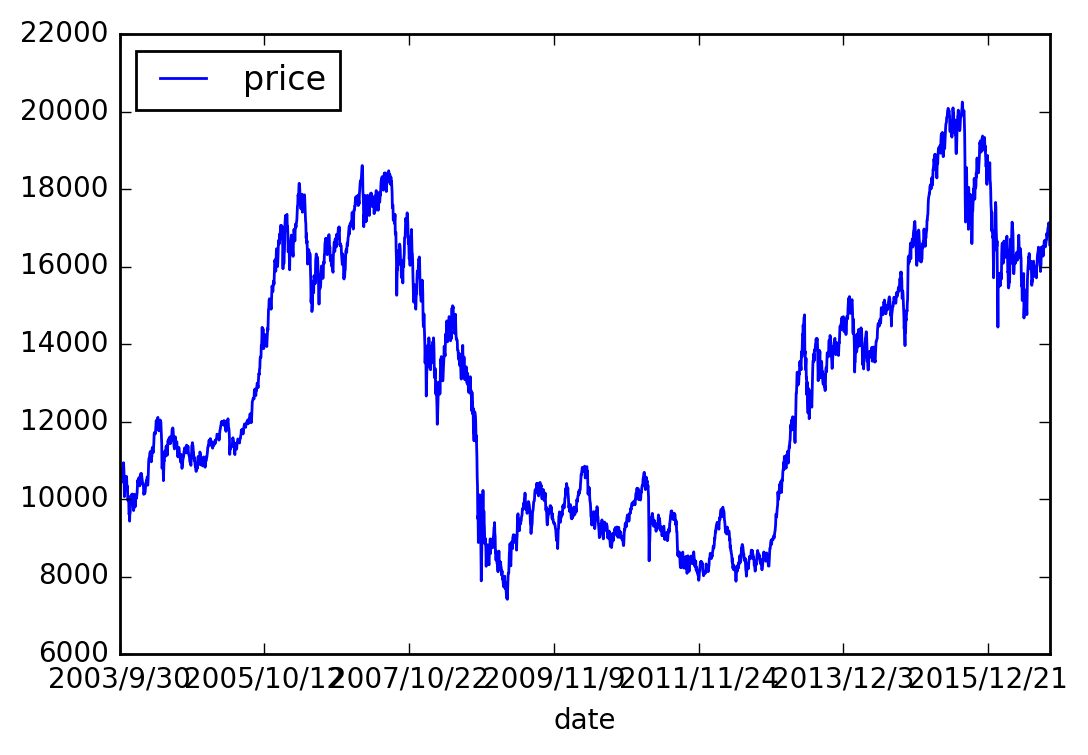

In [6]:
japan_stock.plot(x='date', y='price')

In [7]:
def profhet_forecast(data_frame, forecast_period=30 , period_freq="D", test_period=0, target="y", date="ds", drop_fields=[]):
    data_frame["y"] = data_frame.apply(lambda x: x["price"], axis=1)
    data_frame["ds"] = data_frame.apply(lambda x: x["date"], axis=1)
    drop_fields += [target, date]
    data = data_frame.drop(drop_fields, axis=1)
    if test_period > 0:
        test_data = data[-test_period:]
        train_data = data[:-test_period]
    else:
        test_data = []
        train_data = data
    prophet = Prophet()
    prophet.fit(train_data)
    feature = prophet.make_future_dataframe(periods=forecast_period, freq=period_freq)
    forecast = prophet.predict(feature)
    prophet.plot(forecast)
    return prophet,forecast,test_data

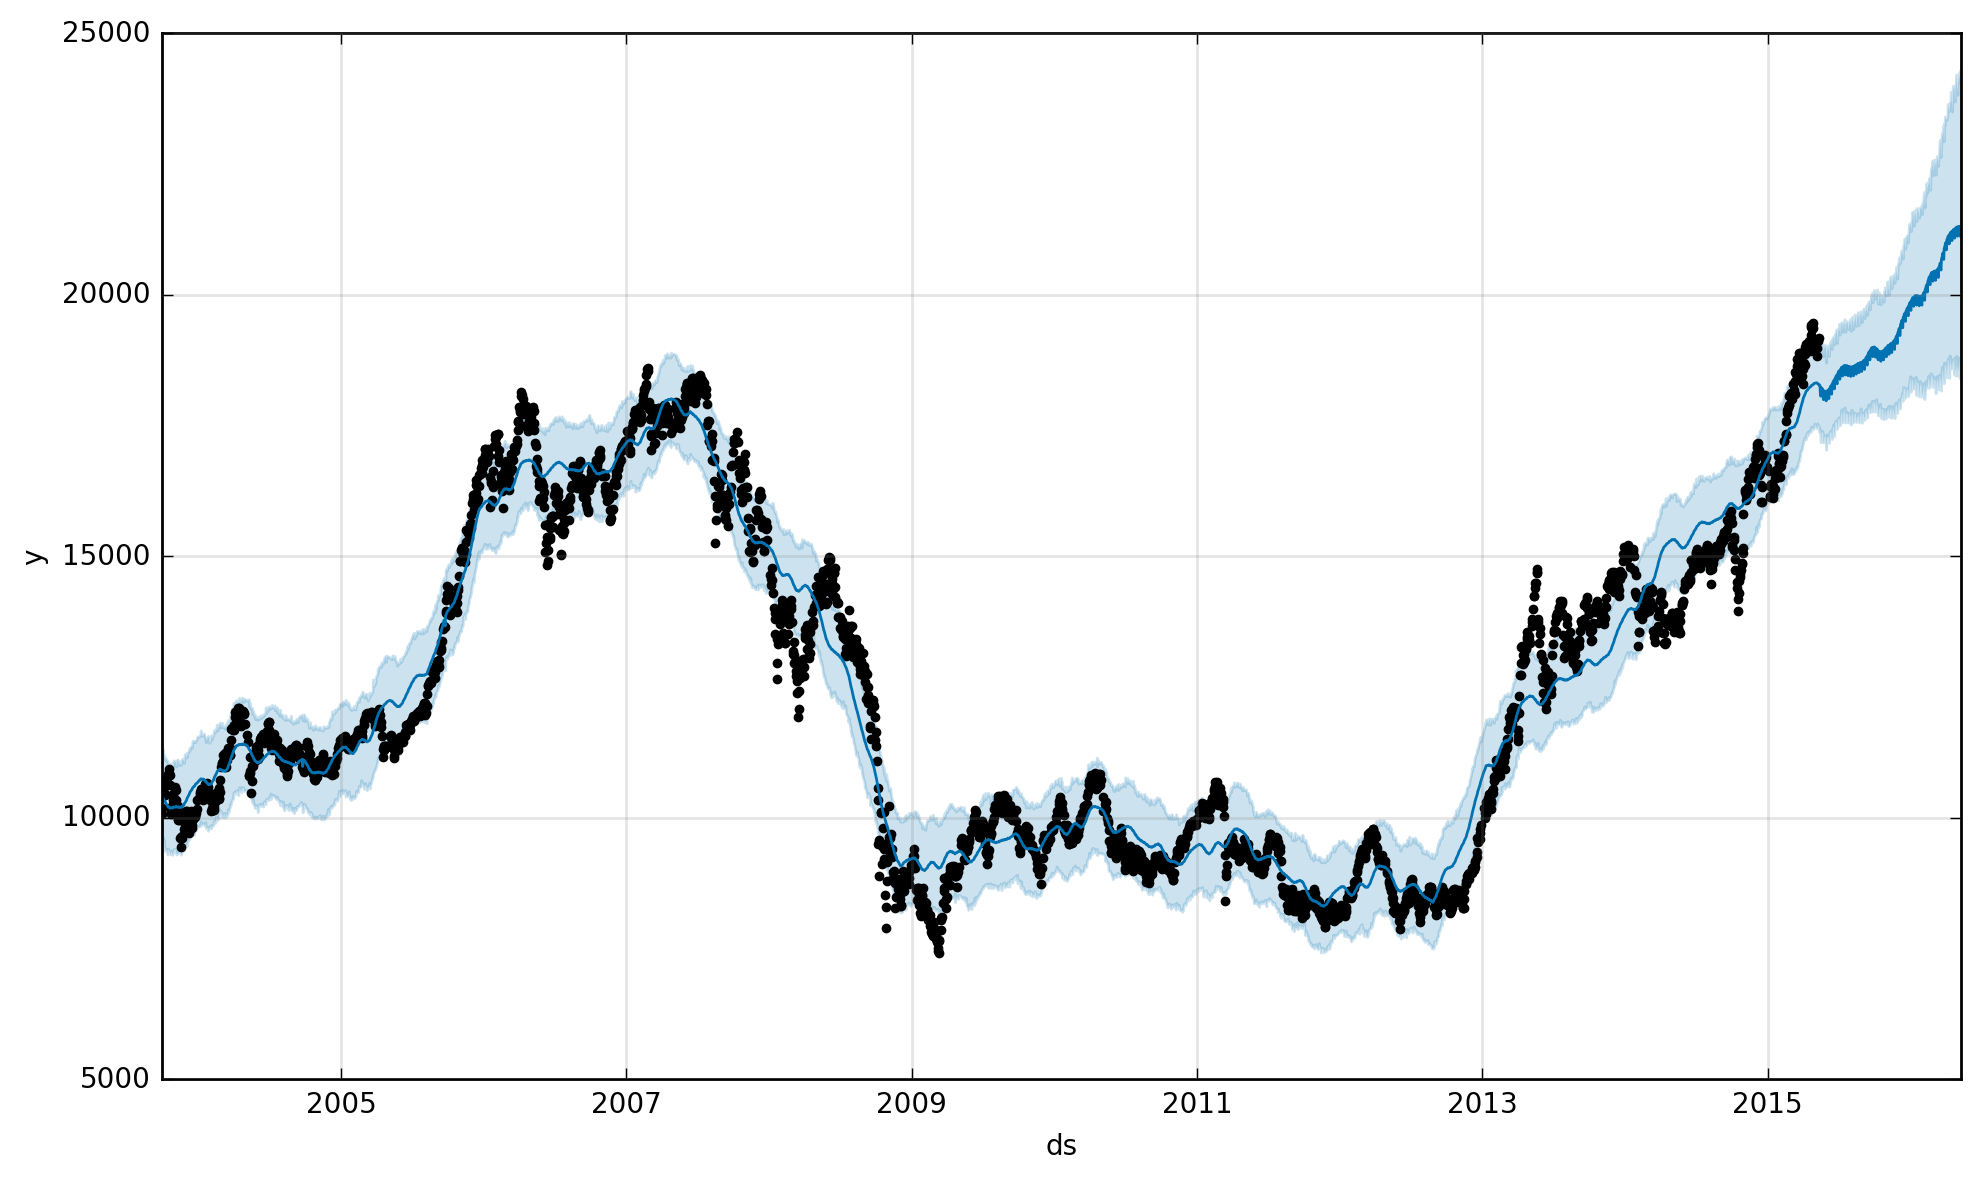

In [8]:
prophet, forecast_data, test_data = profhet_forecast(japan_stock, test_period=365,forecast_period=365, target="price", date="date", drop_fields=["diff","rate"])

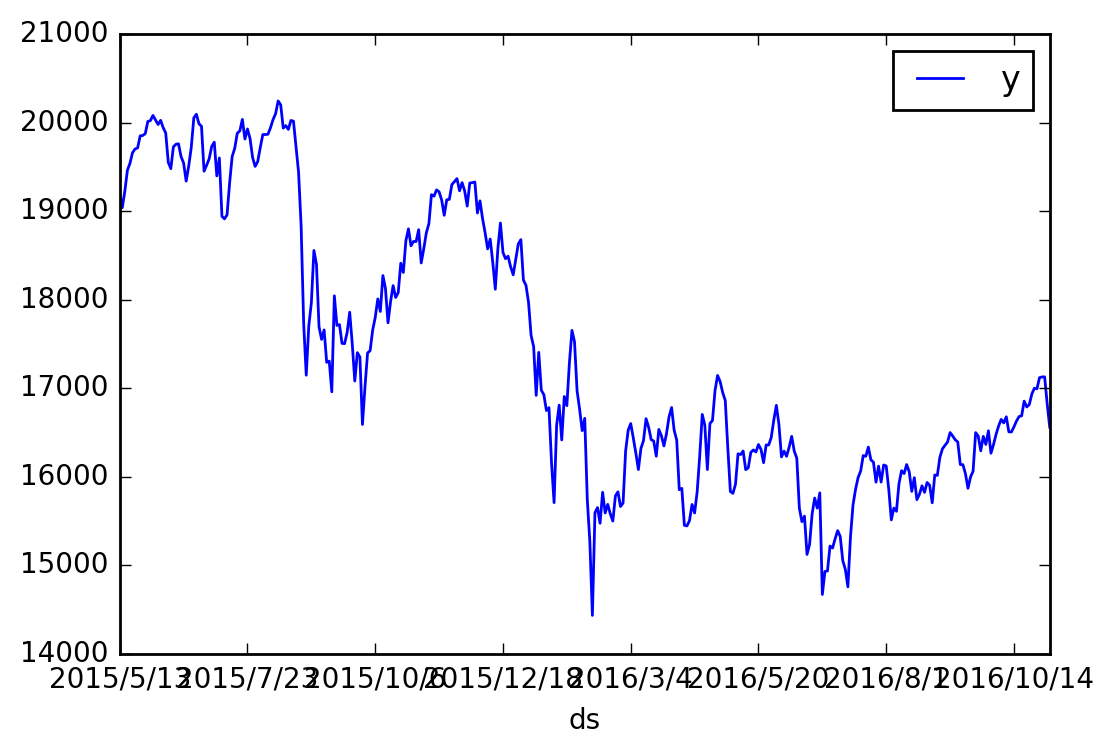

In [9]:
test_data.plot(x='ds', y='y')

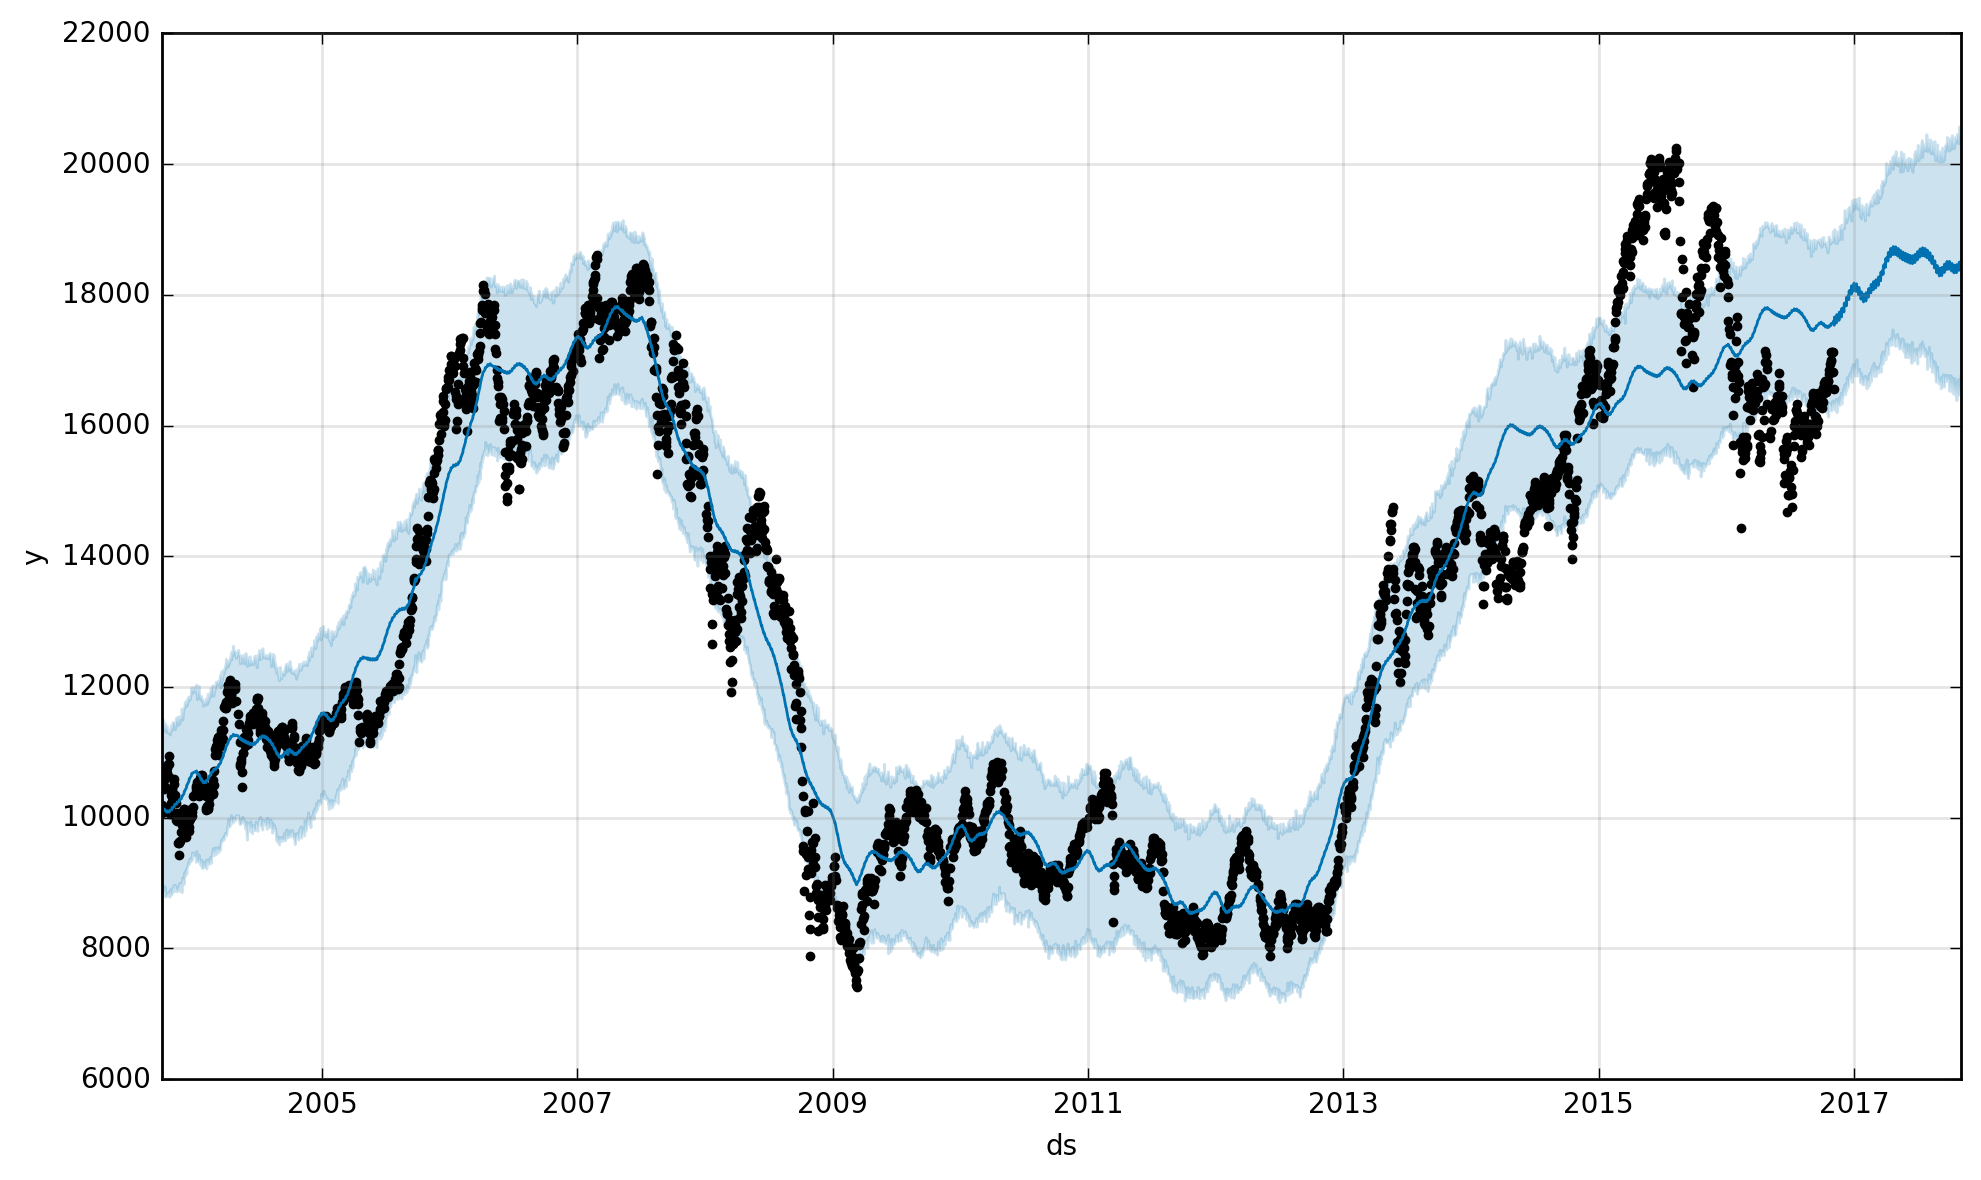

In [10]:
prophet, forecast_data, test_data = profhet_forecast(japan_stock, forecast_period=365, target="price", date="date", drop_fields=["diff","rate"])

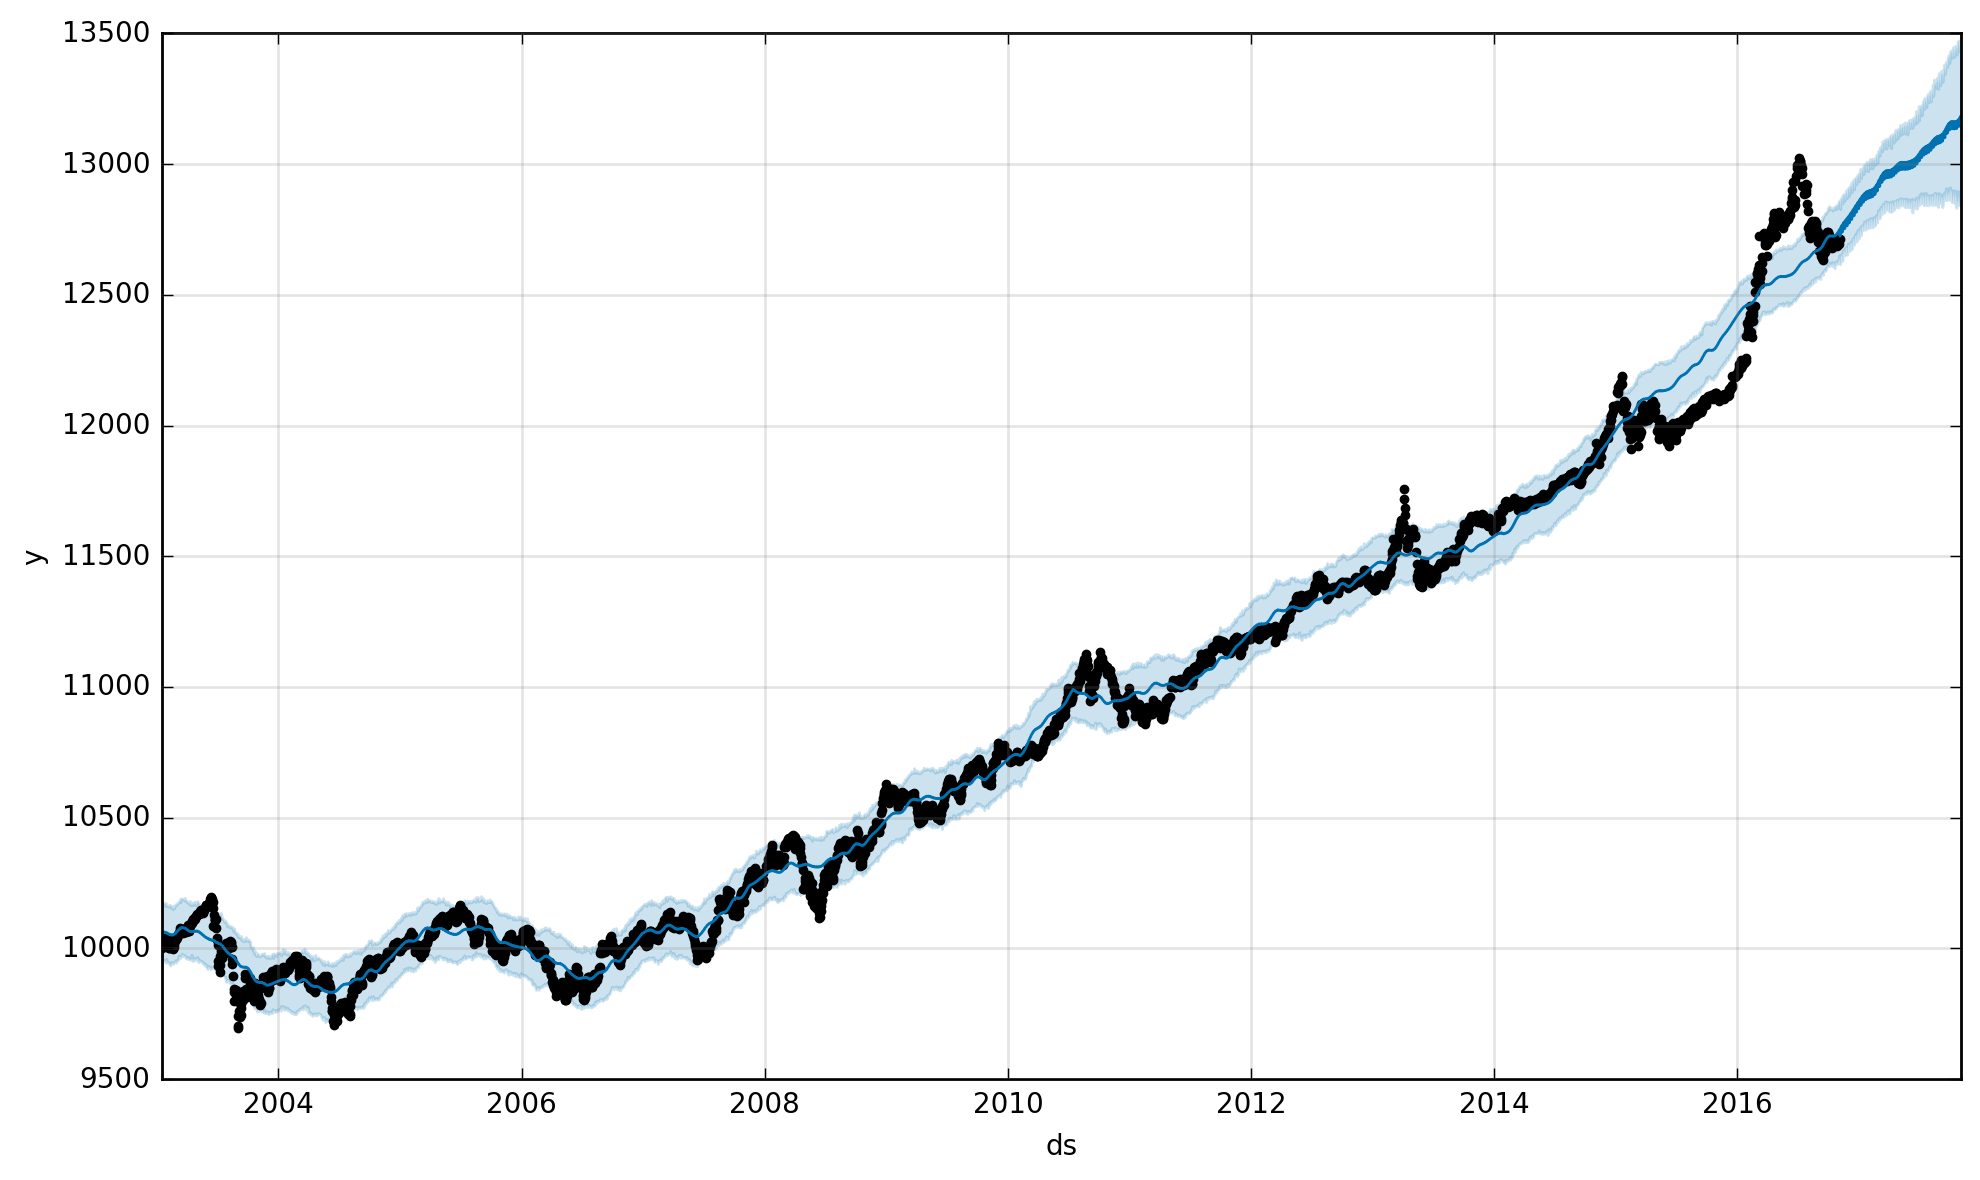

In [11]:
prophet, forecast_data, test_data = profhet_forecast(japan_bond, forecast_period=365, target="price", date="date", drop_fields=["diff","rate"])

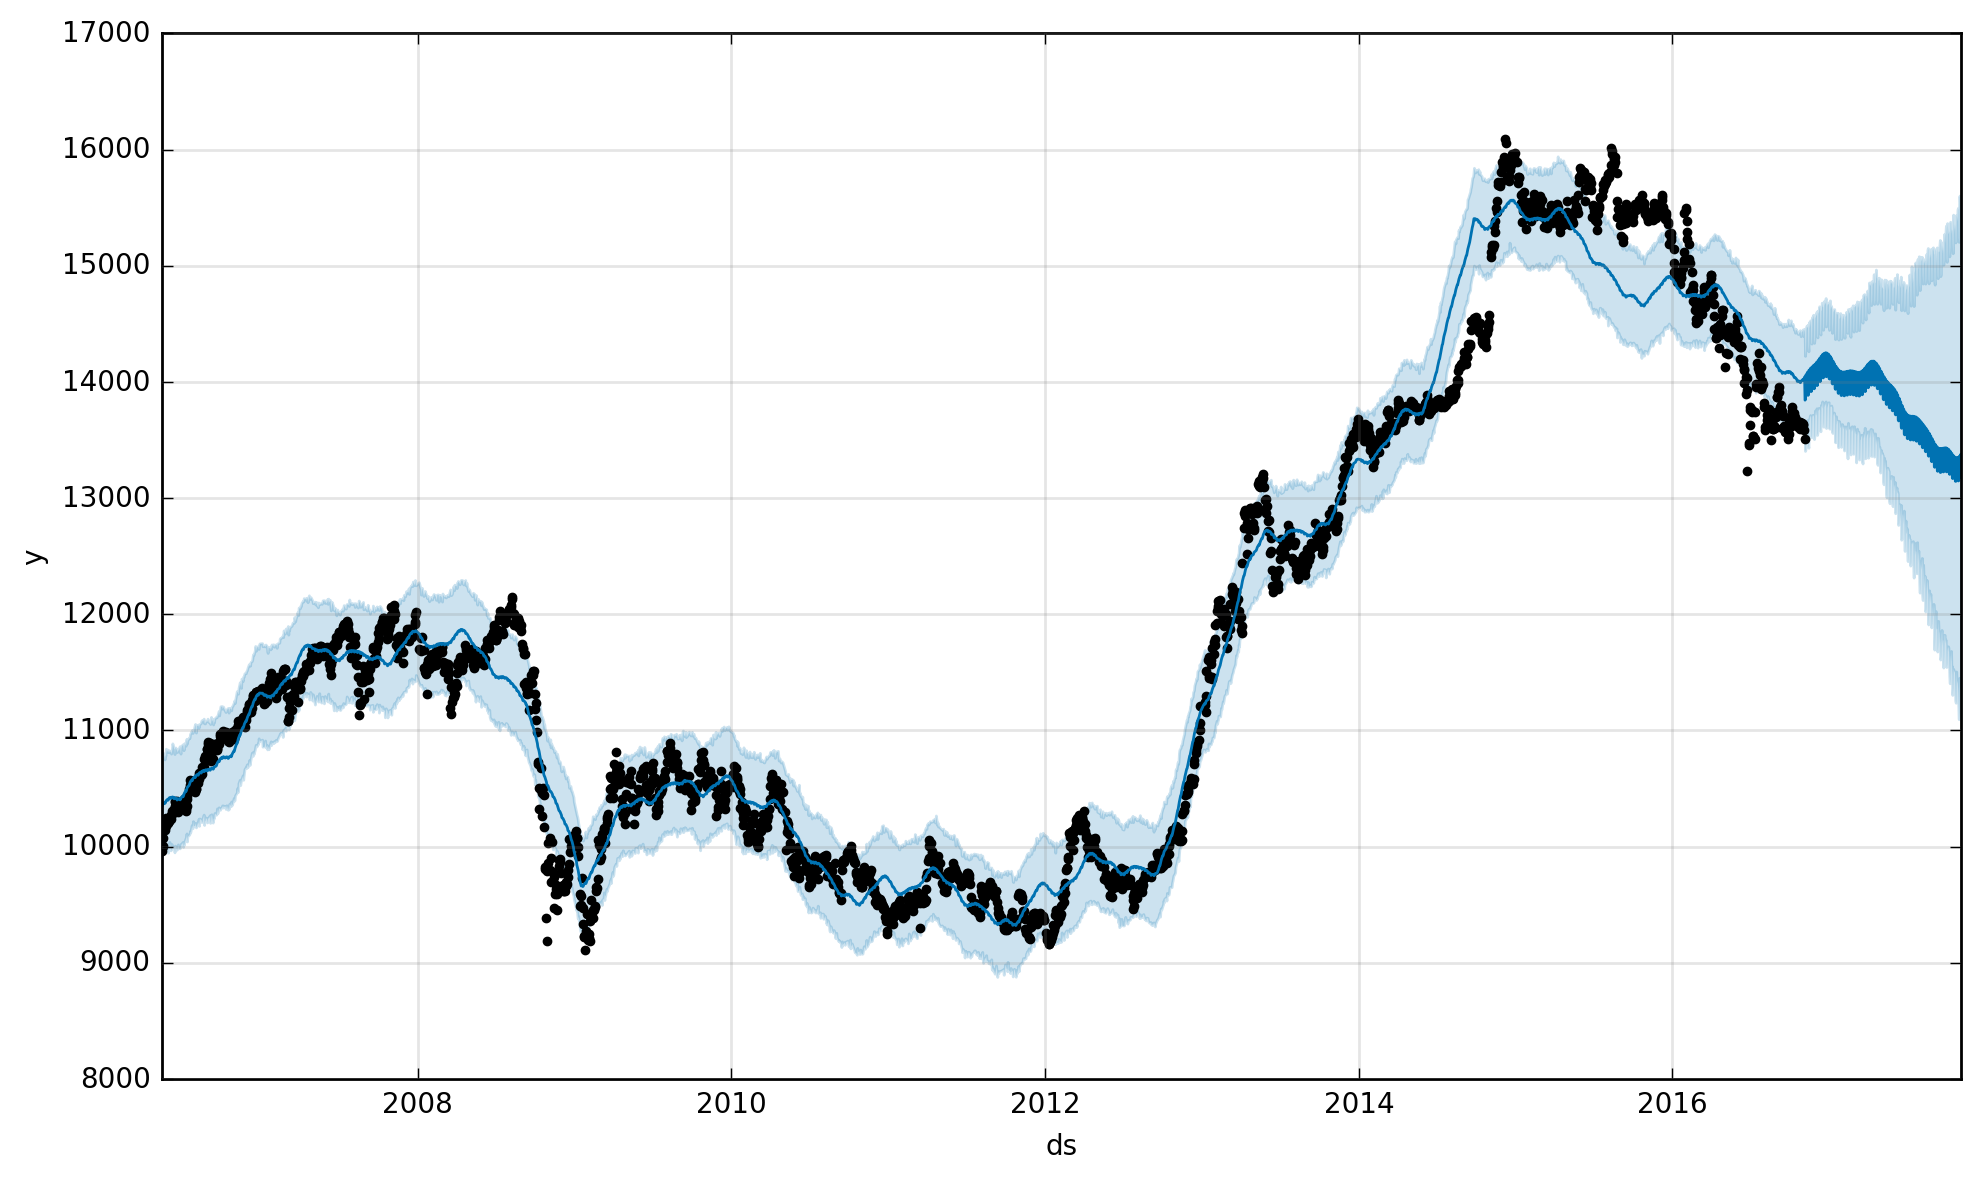

In [12]:
prophet, forecast_data, test_data = profhet_forecast(world_bond, forecast_period=365, target="price", date="date", drop_fields=["diff","rate"])

In [13]:
# out of memoryで計算できない
# prophet, forecast_data, test_data = profhet_forecast(world_stock, forecast_period=365, target="price", date="date", drop_fields=["diff","rate"])